# Cancer Patients in UAE Data Analysis

## Objective

To develop a machine learning model that classifies cancer patient data from the UAE into meaningful categories and clusters. 
The goal is to gain deeper insights into the following:
1. patient profiles
2. improve diagnosis support, and 
3. uncover hidden patterns within the healthcare data.

## Research Goals

I. Exploratory Data Analysis (EDA)

1. In-depth analysis identifying trends, patterns, and relationships:
2. Recovery rates over the years
3. Recovery rate per cancer type
4. Relationship between smoking status and patient outcomes
5. Top 5 most common cancer types and their respective recovery rates

II. Predictive Modeling

1. Machine learning model predicting cancer stage (I, II, III, IV) based on:

    a. Demographic factors: Age, Gender, Nationality, Ethnicity
    
    b. Lifestyle factors: Smoking status
    
    c. Medical history: Comorbidities, Cancer type, Weight, Height

III. Clustering Analysis

1. Patients clustering into groups without

# Project Documentation

## Dataset description
The data includes 10,000 records of synthetic cancer patient data from the United Arab Emirates (UAE) with 20 features, including the following:
1. Patient demographics (Age, Gender, Nationality, Ethnicity)
2. Diagnosis details (Cancer Type, Stage, Diagnosis Date)
3. Treatment information (Treatment Type, Hospital, Physician)
4. Health-related factors (Smoking Status, Comorbidities, Weight, Height)
5. Outcomes (Recovered, Under Treatment, Deceased)

## Tools and libraries used

1. Pandas
2. Numpy
3. Matplotlib
4. Seaborn
5. Scikit Learn

## Step-by-step process overview

1. Descriptive analysis and data exploration
2. Exploratory data analysis
3. Data modelling
4. Data clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the dataset
df = pd.read_csv('_cancer_dataset_uae.csv')

In [5]:
# descritpive Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

In [6]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [7]:
# show the null rows
df[df.isnull()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(10000, 20)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.5397,20.757324,18.0,36.0,53.0,72.0,89.0
Weight,10000.0,69.5500,14.933339,18.0,60.0,70.0,80.0,122.0
Height,10000.0,169.3475,10.070118,131.0,163.0,169.0,176.0,208.0


In [10]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [11]:
df[df['Death_Date'].isnull()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [12]:
df[df['Comorbidities'].isnull()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,PAT009989,61,Female,Expatriate,Ajman,2017-08-20,Colorectal,IV,Chemotherapy,2017-12-01,Dubai Hospital,Dr. TX38,Deceased,2019-01-26 00:00:00,Cancer,Former Smoker,NaN,Arab,73,180
9989,PAT009990,63,Female,Emirati,Sharjah,2019-01-31,Ovarian,II,Surgery,2019-04-12,Dubai Hospital,Dr. UH44,Under Treatment,NaN,NaN,Non-Smoker,NaN,African,95,199
9990,PAT009991,25,Male,Expatriate,Ras Al Khaimah,2016-04-02,Colorectal,II,Immunotherapy,2016-09-16,Dubai Hospital,Dr. KL43,Recovered,NaN,NaN,Smoker,NaN,East Asian,80,183
9992,PAT009993,36,Male,Emirati,Sharjah,2021-03-10,Prostate,II,Radiation,2021-06-19,Sheikh Khalifa Hospital,Dr. XY5,Recovered,NaN,NaN,Non-Smoker,NaN,European,74,170


# Exploratory Analysis

1. Recovery rates over the years
2. Recovery rate per cancer type
3. Smoking status on patient outcome
4. Top 5 most common cancer type and recovery rate

In [13]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [14]:
df['Outcome'].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

In [15]:
df[['Diagnosis_Date','Treatment_Start_Date']]

,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


In [68]:
yearly_outcomes

Outcome,Deceased,Recovered,Under Treatment,Recovery Rate
Year,,,,
2015,88,420,327,0.502994
2016,110,537,443,0.492661
2017,107,511,466,0.471402
2018,100,507,422,0.492711
2019,109,525,450,0.484317
2020,119,554,438,0.498650
2021,105,571,446,0.508913
2022,105,554,434,0.506862
2023,110,531,451,0.486264


In [74]:
yearly_outcomes2 = yearly_outcomes['Recovered']
yearly_outcomes2

Year
2015    420
2016    537
2017    511
2018    507
2019    525
2020    554
2021    571
2022    554
2023    531
2024    221
Name: Recovered, dtype: int64

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


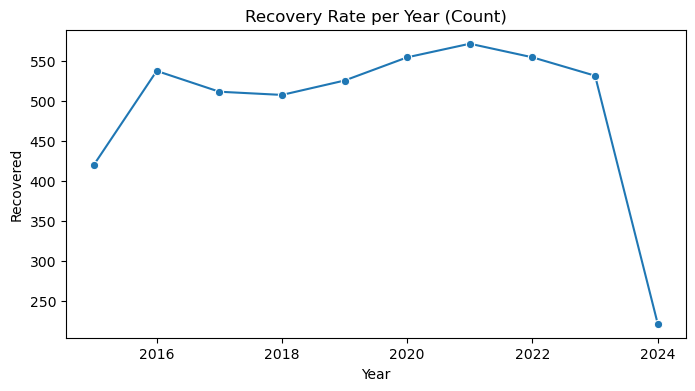

In [125]:
# Plot
plt.figure(figsize=(8,4))
sns.lineplot(yearly_outcomes2, marker='o')
plt.title('Recovery Rate per Year (Count)')
#plt.xlabel('Year')
#plt.ylabel('Recovery Rate')
#plt.ylim(0, 1)
#plt.grid(True)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16532\437089548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])
C:\Users\hp\AppData\Local\Temp\ipykernel_16532\437089548.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df3['Treatment_Start_Date'].dt.year


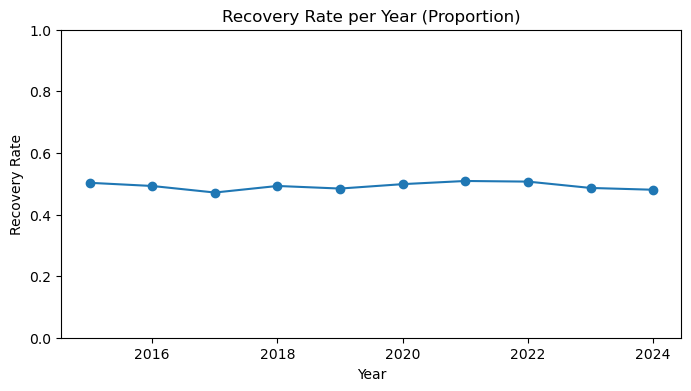

In [123]:
#Recovery rates over the years by proportion
# Using treatment_start date
# Select the needed data
df3 = df[['Diagnosis_Date', 'Treatment_Start_Date', 'Outcome']]

# Make sure Diagnosis_Date is datetime
df3['Treatment_Start_Date'] = pd.to_datetime(df['Treatment_Start_Date'])

# Create a 'Year' column
df3['Year'] = df3['Treatment_Start_Date'].dt.year

# Group by Year and Outcome
yearly_outcomes = df3.groupby(['Year', 'Outcome']).size().unstack(fill_value=0)

# Calculate Recovery Rate
yearly_outcomes['Recovery Rate'] = yearly_outcomes['Recovered'] / yearly_outcomes.sum(axis=1)

# Plot
plt.figure(figsize=(8,4))
plt.plot(yearly_outcomes.index, yearly_outcomes['Recovery Rate'], marker='o')
plt.title('Recovery Rate per Year (Proportion)')
plt.xlabel('Year')
plt.ylabel('Recovery Rate')
plt.ylim(0, 1)
plt.grid(False)
plt.show()

In [18]:
# Recovery rate per cancer type

In [19]:
df['Cancer_Type'].value_counts()

Cancer_Type
Leukemia      1314
Liver         1263
Ovarian       1259
Pancreatic    1243
Breast        1241
Lung          1233
Colorectal    1226
Prostate      1221
Name: count, dtype: int64

In [20]:
df['Outcome'].value_counts()

Outcome
Recovered          4931
Under Treatment    4077
Deceased            992
Name: count, dtype: int64

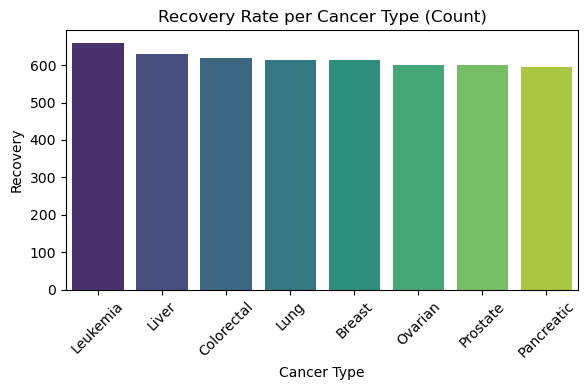

In [124]:
# Group by Cancer_Type and Outcome
recovery_counts = df.groupby('Cancer_Type')['Outcome'].value_counts().unstack()

recovery_counts = recovery_counts['Recovered'].sort_values(ascending = False)
recovery_counts

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=recovery_counts.index, y=recovery_counts.values, palette='viridis')
plt.title('Recovery Rate per Cancer Type (Count)')
plt.ylabel('Recovery')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

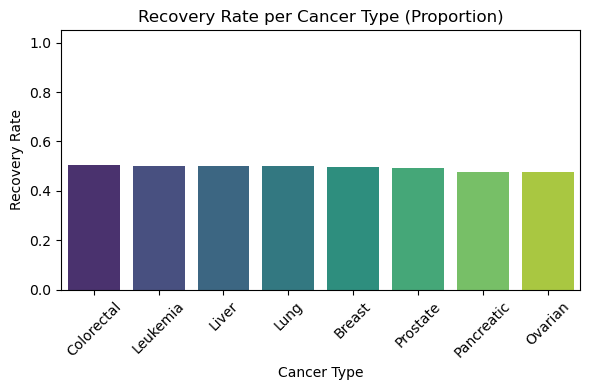

In [126]:
# Group by Cancer_Type and Outcome
outcome_counts = df.groupby('Cancer_Type')['Outcome'].value_counts().unstack(fill_value=0)

# Calculate Recovery Proportion
outcome_counts['Recovery Rate'] = outcome_counts['Recovered'] / outcome_counts.sum(axis=1)

# Sort by recovery rate
recovery_rate = outcome_counts['Recovery Rate'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=recovery_rate.index, y=recovery_rate.values, palette='viridis')
plt.title('Recovery Rate per Cancer Type (Proportion)')
plt.ylabel('Recovery Rate')
plt.xlabel('Cancer Type')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
recovery_counts

Cancer_Type
Breast        614
Leukemia      660
Liver         630
Ovarian       601
Pancreatic    594
dtype: int64

In [22]:
# Smoking status on patient outcome
df['Smoking_Status'].value_counts()

Smoking_Status
Non-Smoker       5038
Smoker           3045
Former Smoker    1917
Name: count, dtype: int64

In [23]:
# Smoking status on patient outcome
smoking_cancer = df.groupby(['Cancer_Type', 'Smoking_Status']).size().unstack(fill_value=0)
smoking_cancer
smoking_outcome = df.groupby(['Smoking_Status', 'Outcome']).size().unstack(fill_value=0)
smoking_outcome

Outcome,Deceased,Recovered,Under Treatment
Smoking_Status,,,
Former Smoker,195,929,793
Non-Smoker,492,2515,2031
Smoker,305,1487,1253


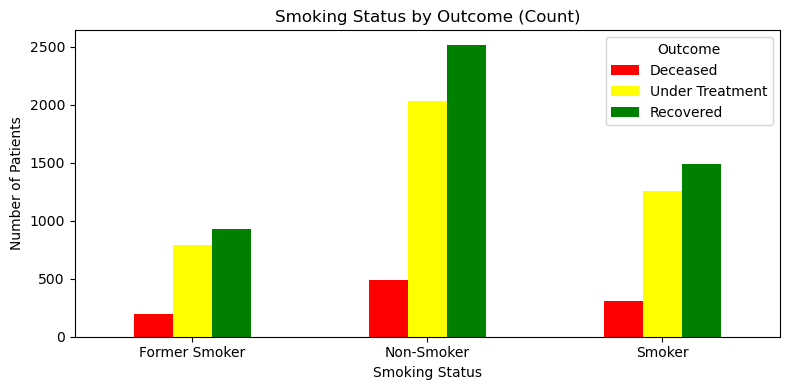

In [135]:
# Group by Smoking_Status and Outcome
smoking_outcome = df.groupby(['Smoking_Status', 'Outcome']).size().unstack(fill_value=0)

# Define custom colors for the outcomes
color_mapping = {
    'Deceased': 'red',
    'Under Treatment': 'yellow',
    'Recovered': 'green',
        
}

# Make sure columns are ordered to match colors
smoking_outcome = smoking_outcome[['Deceased', 'Under Treatment', 'Recovered']]

# Plot
smoking_outcome.plot(kind='bar', stacked=False, figsize=(8,4), color=[color_mapping[col] for col in smoking_outcome.columns])

plt.title('Smoking Status by Outcome (Count)')
plt.ylabel('Number of Patients')
plt.xlabel('Smoking Status')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

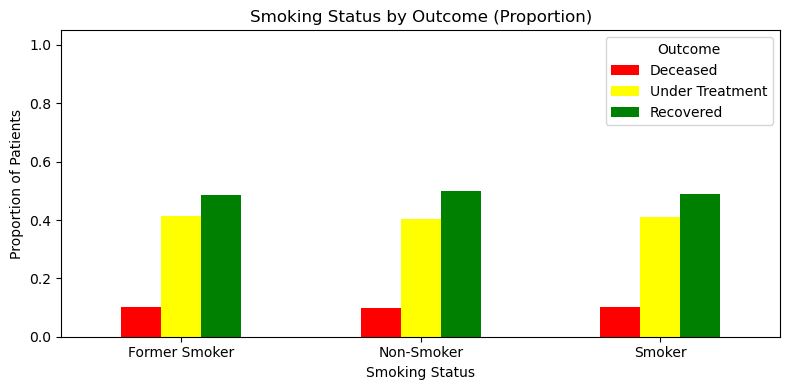

In [136]:
# Group by Smoking_Status and Outcome (Proportion)
smoking_outcome = df.groupby(['Smoking_Status', 'Outcome']).size().unstack(fill_value=0)

# Convert counts to proportions (row-wise)
smoking_outcome_prop = smoking_outcome.div(smoking_outcome.sum(axis=1), axis=0)

# Define custom colors for the outcomes
color_mapping = {
    'Deceased': 'red',
    'Under Treatment': 'yellow',
    'Recovered': 'green',
}

# Ensure column order matches color mapping
smoking_outcome_prop = smoking_outcome_prop[['Deceased', 'Under Treatment', 'Recovered']]

# Plot
smoking_outcome_prop.plot(
    kind='bar',
    stacked=False,
    figsize=(8,4),
    color=[color_mapping[col] for col in smoking_outcome_prop.columns]
)

plt.title('Smoking Status by Outcome (Proportion)')
plt.ylabel('Proportion of Patients')
plt.xlabel('Smoking Status')
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.ylim(0, 1.05)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# Top 5 most common cancer type and recovery rate

In [27]:
df['Cancer_Type'].value_counts().sort_values()

Cancer_Type
Prostate      1221
Colorectal    1226
Lung          1233
Breast        1241
Pancreatic    1243
Ovarian       1259
Liver         1263
Leukemia      1314
Name: count, dtype: int64

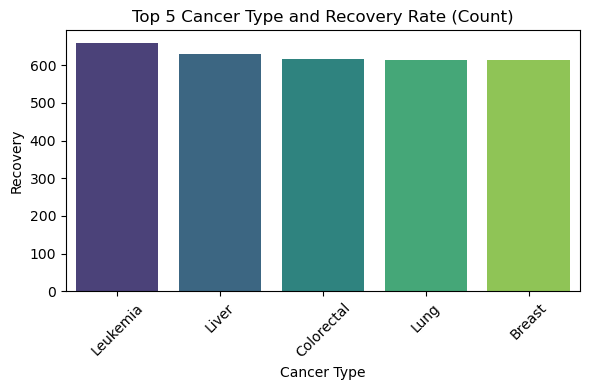

In [137]:
recovery_counts = df.groupby('Cancer_Type')['Outcome'].value_counts().unstack()

top_5 = recovery_counts['Recovered'].sort_values(ascending = False).head()
top_5

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=top_5.index, y=top_5.values, palette='viridis')
plt.title('Top 5 Cancer Type and Recovery Rate (Count)')
plt.ylabel('Recovery')
plt.xlabel('Cancer Type')
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [117]:
recovery_counts.sort_values('Recovered', ascending=False)

Outcome,Deceased,Recovered,Under Treatment
Cancer_Type,,,
Leukemia,127,660,527
Liver,115,630,518
Colorectal,109,618,499
Lung,132,615,486
Breast,120,614,507
Ovarian,128,601,530
Prostate,116,599,506
Pancreatic,145,594,504


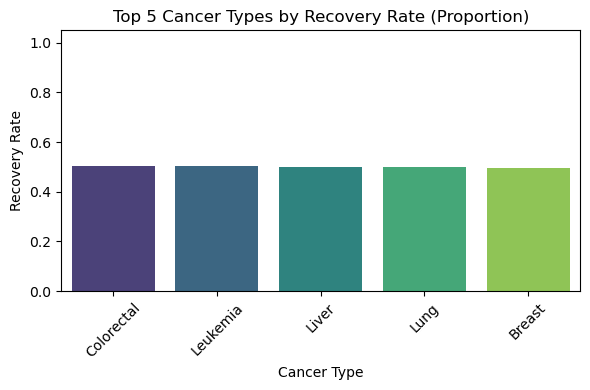

In [131]:
# Group by Cancer_Type and Outcome (Proportion)
outcome_counts = df.groupby('Cancer_Type')['Outcome'].value_counts().unstack(fill_value=0)

# Calculate Recovery Rate (Proportion)
outcome_counts['Recovery Rate'] = outcome_counts['Recovered'] / outcome_counts.sum(axis=1)

# Sort and keep top 5
recovery_rate = outcome_counts['Recovery Rate'].sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=recovery_rate.index, y=recovery_rate.values, palette='viridis')
plt.title('Top 5 Cancer Types by Recovery Rate (Proportion)')
plt.ylabel('Recovery Rate')
plt.xlabel('Cancer Type')
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
recovery_rate

Cancer_Type
Colorectal    0.504078
Leukemia      0.502283
Liver         0.498812
Lung          0.498783
Breast        0.494762
Name: Recovery Rate, dtype: float64

# Insights from EDA

1. Recovery rates over the years

    The recovery rate remained relatively stable from 2016 to 2022, fluctuating between approximately 500-560 units, 
    with a slight peak around 2021 where it reached its highest point of about 560 units. The most dramatic change appears between 
    2023 and 2024, where there's a severe drop from about 530 units to only about 220 units, representing a significant disruption 
    in recovery rate in the year 2024.

    However, judging from the proportion, recovery rates can be said to remain remarkably stable between 2015 and 2024, 
    fluctuating in a narrow band between approximately 0.45 and 0.50. The recovery rate starts around 0.50 in 2015, 
    experiences a slight dip to about 0.46 around 2017, then gradually returns to around 0.50 by 2021, 
    before slightly declining again to about 0.47 by 2024. This proportional view shows almost no significant change in recovery rate during the years.

2. Recovery rate per cancer type

    Looking at the frequency counts, the recovery counts gradually decrease across the cancer types shown, with Liver (620), 
    Colorectal and Lung (both ~610), Breast (605), Ovarian (595), Prostate (590), and Pancreatic (585) forming a descending pattern.
    While there is a noticeable difference between the highest (Leukemia) and lowest (Pancreatic) recovery counts, 
    the overall variation is relatively modest - approximately a 10% difference between the highest and lowest values.

    However, when viewed as proportions, all cancer types show remarkably similar recovery rates between 0.45 and 0.50 (or 45-50%).
    Colorectal cancer shows the highest recovery rate at approximately 0.50 (50%), followed closely by Leukemia, Liver, and Lung cancer,
    all having very similar rates around 0.49. Breast and Prostate cancers are in the middle range at roughly 0.48, while Pancreatic and Ovarian cancers 
    show slightly lower recovery rates at approximately 0.47 and 0.46 respectively. This proportional view reveals that the recovery efficiency 
    is remarkably consistent across different cancer types, with only about a 4% difference between the highest and lowest performers.

3. Smoking status on patient outcome

    Non-smokers represent the largest group overall with approximately 5,000 total patients. They show the highest numbers across all outcome 
    categories, with about 2,500 recovered, 2,000 under treatment, and 500 deceased. Smokers form the second largest group with roughly 
    3,000 total patients. Their outcomes include approximately 1,500 recovered, 1,250 under treatment, and 300 deceased. 
    Former smokers represent the smallest group with about 2,000 total patients, showing approximately 900 recovered, 
    800 under treatment, and 200 deceased. Judging from the relative proportions within each smoking status, recovery rates appear similar 
    across all three groups (roughly 50% of each group), the number of deceased patients is highest among non-smokers at about 10% of their total. 
    The "under treatment" category shows similar proportions across all groups.

    Judging from the proportions, that outcomes are remarkably consistent across all three smoking status categories. Recovery rates (green bars) 
    are approximately 0.50 (50%) for all three categories, with non-smokers showing a very slightly higher recovery rate at about 0.51.
    Patients under treatment (yellow bars) represent approximately 0.40 (40%) across all three categories. Deceased rates (red bars) 
    are consistently around 0.10 (10%) for former smokers, non-smokers, and current smokers. This proportional view reveals that, 
    contrary to what might be expected, smoking status appears to have minimal impact on patient outcomes in this dataset.

4. Top 5 most common cancer type and recovery rate

    Judging from the frequency counts, Leukemia shows the highest recovery count at approximately 650 patients, 
    making it the leader among these five cancer types. Followed by liver cancer with about 620 recoveries, showing a slight decrease from leukemia.
    Colorectal cancer is third with approximately 610 recoveries. Lung cancer is fourth with about 605 recoveries. Breast cancer rounds out the 
    top 5 with approximately 600 recoveries. While leukemia has the highest recovery count, the differences between these five cancer
    types are relatively small between the highest and lowest recovery counts, suggesting that these five cancer types have somewhat similar 
    absolute recovery numbers.

    Judging from the proportions, colorectal cancer has the highest recovery rate at approximately 0.50 (50%), although the difference between 
    types is minimal. Leukemia follows with a recovery rate of about 0.50 (50%) as well, nearly identical to colorectal cancer.
    Liver, Lung, and Breast cancer all show very similar recovery rates of approximately 0.49 (49%). The recovery rates are similar across all 
    five cancer types

# Predictive Modelling

In [29]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [30]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Nationality', 'Emirate',
       'Diagnosis_Date', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Type',
       'Treatment_Start_Date', 'Hospital', 'Primary_Physician', 'Outcome',
       'Death_Date', 'Cause_of_Death', 'Smoking_Status', 'Comorbidities',
       'Ethnicity', 'Weight', 'Height'],
      dtype='object')

In [31]:
df[['Age', 'Gender', 'Nationality', 'Ethnicity']].nunique()

Age            72
Gender          3
Nationality     2
Ethnicity       5
dtype: int64

In [32]:
df['Ethnicity'].unique()

array(['European', 'South Asian', 'African', 'East Asian', 'Arab'],
      dtype=object)

In [33]:
# Selecting X and y data

In [34]:
X = df[['Age', 'Gender', 'Nationality', 'Ethnicity', 'Smoking_Status', 'Comorbidities', 'Cancer_Type', 'Weight', 'Height']]

In [35]:
y = df['Cancer_Stage']

In [36]:
X

,Age,Gender,Nationality,Ethnicity,Smoking_Status,Comorbidities,Cancer_Type,Weight,Height
0,69,Female,Emirati,European,Non-Smoker,NaN,Liver,61,157
1,32,Male,Emirati,South Asian,Smoker,NaN,Leukemia,80,175
2,89,Male,Emirati,South Asian,Non-Smoker,NaN,Liver,50,175
3,78,Female,Emirati,African,Former Smoker,NaN,Lung,44,155
4,38,Female,Emirati,East Asian,Former Smoker,NaN,Pancreatic,101,160
...,...,...,...,...,...,...,...,...,...
9995,88,Male,Emirati,European,Smoker,Cardiovascular Disease,Ovarian,55,168
9996,43,Male,Emirati,African,Non-Smoker,Diabetes,Ovarian,98,175
9997,63,Female,Emirati,East Asian,Non-Smoker,NaN,Lung,92,165
9998,63,Female,Emirati,European,Smoker,Hypertension,Lung,68,193


In [37]:
y

0        II
1       III
2       III
3       III
4        II
       ... 
9995     II
9996    III
9997    III
9998     IV
9999      I
Name: Cancer_Stage, Length: 10000, dtype: object

In [38]:
# Scale the needed variables (age, weight and height) using StandardScaler
column = X[['Age', 'Weight', 'Height']]
column

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(column)

#print(X_scaled)

#Convert the scaled array to a DataFrame with the same column names
scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Weight', 'Height'], index=X.index)
scaled_df

X[['Age', 'Weight', 'Height']] = scaled_df

X

C:\Users\hp\AppData\Local\Temp\ipykernel_16532\3241053737.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age', 'Weight', 'Height']] = scaled_df


,Age,Gender,Nationality,Ethnicity,Smoking_Status,Comorbidities,Cancer_Type,Weight,Height
0,0.744849,Female,Emirati,European,Non-Smoker,NaN,Liver,-0.572573,-1.226214
1,-1.037743,Male,Emirati,South Asian,Smoker,NaN,Leukemia,0.699812,0.561342
2,1.708413,Male,Emirati,South Asian,Non-Smoker,NaN,Liver,-1.309217,0.561342
3,1.178453,Female,Emirati,African,Former Smoker,NaN,Lung,-1.711022,-1.424831
4,-0.748674,Female,Emirati,East Asian,Former Smoker,NaN,Pancreatic,2.106131,-0.928288
...,...,...,...,...,...,...,...,...,...
9995,1.660234,Male,Emirati,European,Smoker,Cardiovascular Disease,Ovarian,-0.974379,-0.133818
9996,-0.507784,Male,Emirati,African,Non-Smoker,Diabetes,Ovarian,1.905229,0.561342
9997,0.455780,Female,Emirati,East Asian,Non-Smoker,NaN,Lung,1.503423,-0.431744
9998,0.455780,Female,Emirati,European,Smoker,Hypertension,Lung,-0.103800,2.348898


In [39]:
#convert the categorical data into dummy variables
X = pd.get_dummies(X, drop_first = True, dtype=int)

In [40]:
X.head()

,Age,Weight,Height,Gender_Male,Gender_Other,Nationality_Expatriate,Ethnicity_Arab,Ethnicity_East Asian,Ethnicity_European,Ethnicity_South Asian,...,Smoking_Status_Smoker,Comorbidities_Diabetes,Comorbidities_Hypertension,Cancer_Type_Colorectal,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Ovarian,Cancer_Type_Pancreatic,Cancer_Type_Prostate
0,0.744849,-0.572573,-1.226214,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.037743,0.699812,0.561342,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,1.708413,-1.309217,0.561342,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.178453,-1.711022,-1.424831,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.748674,2.106131,-0.928288,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
y

0        II
1       III
2       III
3       III
4        II
       ... 
9995     II
9996    III
9997    III
9998     IV
9999      I
Name: Cancer_Stage, Length: 10000, dtype: object

In [42]:
print(X.shape)
print(y.shape)

(10000, 21)
(10000,)


In [43]:
y.value_counts()

Cancer_Stage
III    3041
II     3036
I      2419
IV     1504
Name: count, dtype: int64

In [141]:
# Modelling the Data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [45]:
# Split the data into train test features and target variables
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [46]:
# convert y into numerical score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [142]:
# Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

#fit the model
model.fit(X_train, y_train_encoded)

test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

# Check the model acuracy, precision and recall score
accuracy = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:',accuracy)
accuracy2 = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:',accuracy2)
precision = precision_score(y_test_encoded, test_predictions, average = 'macro')
print('precision_score:', precision)
recall = recall_score(y_test_encoded, test_predictions, average = 'macro')
print('recall_score:',recall)

training_accuracy_score: 0.323
testing_accuracy_score: 0.30466666666666664
precision_score: 0.2189367860663161
recall_score: 0.2536321623415947


In [48]:
# Ordinal logistic regression
#!pip install mord

In [143]:
# Ordinal logistic regression
import mord
ordinal_model = mord.LogisticAT(alpha=1.0)
ordinal_model.fit(X_train, y_train_encoded)

# Predict
y_pred = ordinal_model.predict(X_test)

# Check the model acuracy, precision and recall score
accuracy_orl = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:',accuracy_orl)
accuracy2_orl = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:',accuracy2_orl)
precision_orl = precision_score(y_test_encoded, test_predictions, average = 'macro')
print('precision_score:', precision_orl)
recall_orl = recall_score(y_test_encoded, test_predictions, average = 'macro')
print('recall_score:',recall_orl)

training_accuracy_score: 0.323
testing_accuracy_score: 0.30466666666666664
precision_score: 0.2189367860663161
recall_score: 0.2536321623415947


In [50]:
# For Support Vector Machine
svm_model = SVC(kernel='rbf', random_state=101)
svm_model.fit(X_train, y_train_encoded)
y_pred_svm = svm_model.predict(X_test)

In [144]:
# Check the model acuracy, precision and recall score
accuracy_svm = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:',accuracy_svm)
accuracy2_svm = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:',accuracy2_svm)
precision_svm = precision_score(y_test_encoded, test_predictions, average = 'macro')
print('precision_score:', precision_svm)
recall_svm = recall_score(y_test_encoded, test_predictions, average = 'macro')
print('recall_score:',recall_svm)

training_accuracy_score: 0.323
testing_accuracy_score: 0.30466666666666664
precision_score: 0.2189367860663161
recall_score: 0.2536321623415947


In [145]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_encoded)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:',accuracy_knn)
accuracy2_knn = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:',accuracy2_knn)
precision_knn = precision_score(y_test_encoded, test_predictions, average = 'macro')
print('precision_score:', precision_knn)
recall_knn = recall_score(y_test_encoded, test_predictions, average = 'macro')
print('recall_score:',recall_knn)

training_accuracy_score: 0.323
testing_accuracy_score: 0.30466666666666664
precision_score: 0.2189367860663161
recall_score: 0.2536321623415947


In [146]:
# Random forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_knn = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:',accuracy_knn)
accuracy2_knn = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:',accuracy2_knn)
precision_knn = precision_score(y_test_encoded, test_predictions, average = 'macro')
print('precision_score:', precision_knn)
recall_knn = recall_score(y_test_encoded, test_predictions, average = 'macro')
print('recall_score:',recall_knn)

training_accuracy_score: 0.323
testing_accuracy_score: 0.30466666666666664
precision_score: 0.2189367860663161
recall_score: 0.2536321623415947


In [147]:
# XGBClassifier
# !pip install xgboost

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)

# Predict on both train and test
train_predictions = xgb_model.predict(X_train)
test_predictions = xgb_model.predict(X_test)

# Evaluate
accuracy_xgb_train = accuracy_score(y_train_encoded, train_predictions)
print('training_accuracy_score:', accuracy_xgb_train)

accuracy_xgb_test = accuracy_score(y_test_encoded, test_predictions)
print('testing_accuracy_score:', accuracy_xgb_test)

precision_xgb = precision_score(y_test_encoded, test_predictions, average='macro')
print('precision_score:', precision_xgb)

recall_xgb = recall_score(y_test_encoded, test_predictions, average='macro')
print('recall_score:', recall_xgb)

E:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


training_accuracy_score: 0.8222857142857143
testing_accuracy_score: 0.2823333333333333
precision_score: 0.2496591144409655
recall_score: 0.24917183403773477


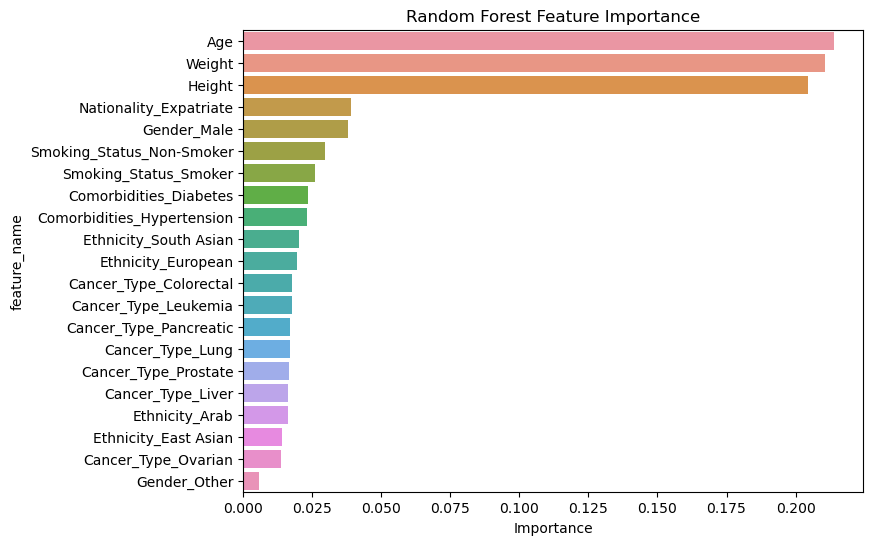

In [55]:
# Get feature importance for random forest
importance = importances = rf_model.feature_importances_

features = X.columns

# Plot feature importance
rf_imp_df = pd.DataFrame({'feature_name':features, 'Importance':importance})  # or from your pipeline's column transformer
rf_imp_df = rf_imp_df.sort_values('Importance', ascending = False)

# plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(data = rf_imp_df, x = 'Importance', y = 'feature_name')
plt.title("Random Forest Feature Importance")
plt.show()

In [56]:
rf_imp_df

,feature_name,Importance
0,Age,0.213780
1,Weight,0.210561
2,Height,0.204483
5,Nationality_Expatriate,0.038942
3,Gender_Male,0.038054
10,Smoking_Status_Non-Smoker,0.029684
11,Smoking_Status_Smoker,0.026010
12,Comorbidities_Diabetes,0.023647
13,Comorbidities_Hypertension,0.023185
9,Ethnicity_South Asian,0.020238


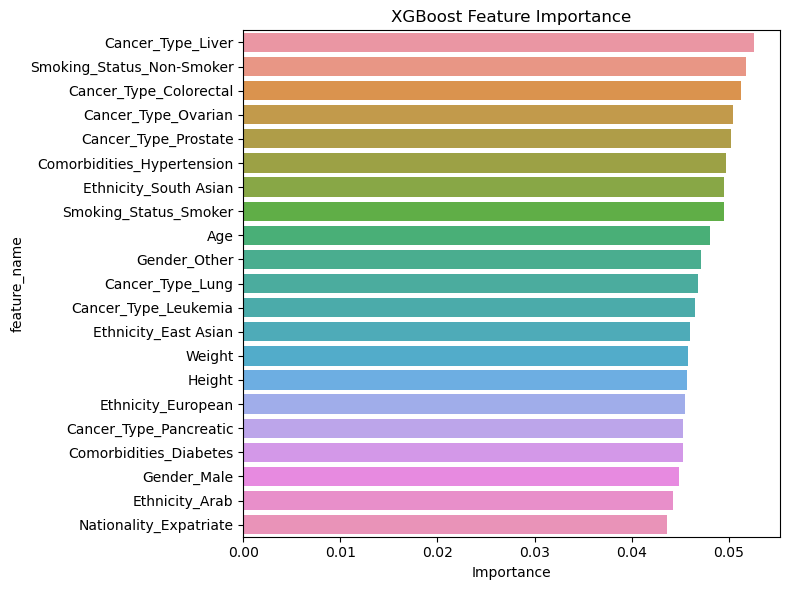

In [57]:
# feature importance for XGBClassifier
# Get feature importances from XGBClassifier (gain-based)
importance = xgb_model.feature_importances_  # this gives same order as X_train.columns
features = X.columns  # or X_train.columns if it's been split

# Create DataFrame
xgb_imp_df = pd.DataFrame({'feature_name': features, 'Importance': importance})
xgb_imp_df = xgb_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=xgb_imp_df, x='Importance', y='feature_name')
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [58]:
xgb_imp_df

,feature_name,Importance
16,Cancer_Type_Liver,0.052641
10,Smoking_Status_Non-Smoker,0.051785
14,Cancer_Type_Colorectal,0.051207
18,Cancer_Type_Ovarian,0.050431
20,Cancer_Type_Prostate,0.050250
13,Comorbidities_Hypertension,0.049665
9,Ethnicity_South Asian,0.049551
11,Smoking_Status_Smoker,0.049510
0,Age,0.048042
4,Gender_Other,0.047126


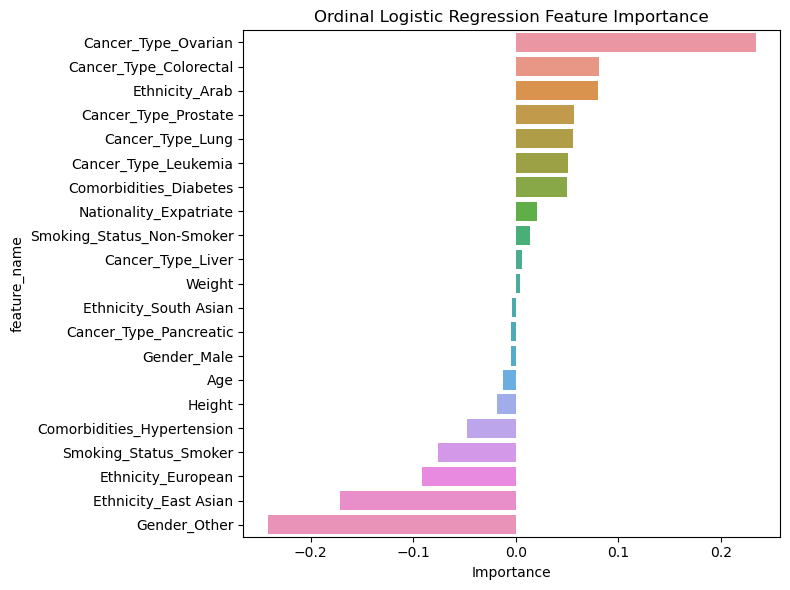

In [59]:
# Extract coefficients (feature importances)
importance = ordinal_model.coef_  # shape: (n_features,)
features = X.columns  # or X_train.columns

# Create DataFrame
ord_imp_df = pd.DataFrame({'feature_name': features, 'Importance': importance})
ord_imp_df = ord_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=ord_imp_df, x='Importance', y='feature_name')
plt.title("Ordinal Logistic Regression Feature Importance")
plt.tight_layout()
plt.show()

In [60]:
ord_imp_df

,feature_name,Importance
18,Cancer_Type_Ovarian,0.233981
14,Cancer_Type_Colorectal,0.081338
6,Ethnicity_Arab,0.080409
20,Cancer_Type_Prostate,0.056892
17,Cancer_Type_Lung,0.056103
15,Cancer_Type_Leukemia,0.051286
12,Comorbidities_Diabetes,0.050227
5,Nationality_Expatriate,0.020364
10,Smoking_Status_Non-Smoker,0.014273
16,Cancer_Type_Liver,0.005836


# Insights from Data Modelling
This data was trained on different models, which include Multinomial Logistic Regression, Ordinal Regression, Random Forest Classifier, 
KNeighborsClassifier, Support Vector Machine and XGBClassifier.

Looking at their various scores for accuracy, precision and recall, the Multinomial Logistic Regression, Ordinal Regression, RandomForestClassifier,
KNeighborsClassifier and Support Vector Machine performed slightly the same with accuracy score of 0.323, precision_score of 0.219 and 
recall_score of 0.254. However, XGBclassifier performed much better, with an accuracy_score of 0.822, precision_score of 0.250 and recall_score of 0.250.

In determining the feature importance, three of these models, which include Random Forest Classifier, XGBClassifier and Ordinal Regression were
considered. For Random Forest Classifier, Age, Weight and Height appeared as the most important features for predicting cancer stage. 
For Ordinal Logistic Regression, Cancer type, Ethinicity and Comorbidities are the most important features for predicting cancer stage. 
For XGBClassifier, cancer type, smoking status, Comorbidities and Ethnicity appear as the most important features for predicting cancer stage.

# Unsupervised Learning

In [61]:
df.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Age     Weight      Height
Cluster                                  
0        44.587417  54.131734  166.728189
1        36.465959  79.685509  171.337289
2        74.051262  72.586075  169.644478


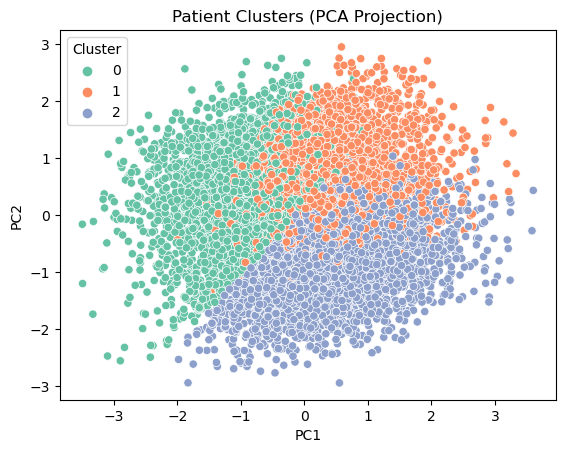

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Drop outcome-related or identifier columns
df_cleaned = df.drop(columns=[
    'Patient_ID', 'Diagnosis_Date', 'Treatment_Start_Date', 'Outcome',
    'Cancer_Stage', 'Primary_Physician', 'Hospital', 'Death_Date', 'Cause_of_Death'
])

# Define numerical and categorical features
numerical_features = ['Age', 'Weight', 'Height']
categorical_features = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 
                        'Treatment_Type', 'Smoking_Status', 'Comorbidities', 'Ethnicity']

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

# Final pipeline with KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

# Fit the model
pipeline.fit(df_cleaned)
df_cleaned['Cluster'] = pipeline.named_steps['kmeans'].labels_

# Optional: analyze clusters
print(df_cleaned.groupby('Cluster').mean(numeric_only=True))

# Visualize with PCA (2D projection)
from sklearn.decomposition import PCA

X_preprocessed = pipeline.named_steps['preprocessor'].transform(df_cleaned.drop(columns='Cluster')).toarray()


pca = PCA(n_components=2)
components = pca.fit_transform(X_preprocessed)

# Add components to the DataFrame
df_cleaned['PC1'] = components[:, 0]
df_cleaned['PC2'] = components[:, 1]

# Plot
sns.scatterplot(data=df_cleaned, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Patient Clusters (PCA Projection)')
plt.show()

---
Cluster 0: Older, lighter weight
Cluster 1: Younger, heavier weight
Cluster 2: Much older

In [64]:
# Adding more categories to the feature
df_cleaned.groupby('Cluster').agg({
    'Age': 'mean',
    'Weight': 'mean',
    'Height': 'mean',
    'Smoking_Status': lambda x: x.value_counts().index[0],
    'Treatment_Type': lambda x: x.value_counts().index[0],
    'Ethnicity': lambda x: x.value_counts().index[0]
})

,Age,Weight,Height,Smoking_Status,Treatment_Type,Ethnicity
Cluster,,,,,,
0,44.587417,54.131734,166.728189,Non-Smoker,Surgery,East Asian
1,36.465959,79.685509,171.337289,Non-Smoker,Immunotherapy,South Asian
2,74.051262,72.586075,169.644478,Non-Smoker,Radiation,South Asian


In [65]:
# Show distribution of Smoking_Status per cluster
print("Smoking Status per Cluster:")
print(df_cleaned.groupby('Cluster')['Smoking_Status'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Treatment_Type per cluster
print("\nTreatment Type per Cluster:")
print(df_cleaned.groupby('Cluster')['Treatment_Type'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Ethnicity per cluster
print("\nEthnicity per Cluster:")
print(df_cleaned.groupby('Cluster')['Ethnicity'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Gender per cluster
print("\nGender per Cluster:")
print(df_cleaned.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Nationality per cluster
print("\nNationality per Cluster:")
print(df_cleaned.groupby('Cluster')['Nationality'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Comorbidities per cluster
print("\nEthnicity per Cluster:")
print(df_cleaned.groupby('Cluster')['Comorbidities'].value_counts(normalize=True).unstack().fillna(0).round(2))

# Show distribution of Cancer type per cluster
print("\nEthnicity per Cluster:")
print(df_cleaned.groupby('Cluster')['Cancer_Type'].value_counts(normalize=True).unstack().fillna(0).round(2))

Smoking Status per Cluster:
Smoking_Status  Former Smoker  Non-Smoker  Smoker
Cluster                                          
0                        0.19        0.53    0.28
1                        0.20        0.48    0.32
2                        0.19        0.51    0.30

Treatment Type per Cluster:
Treatment_Type  Chemotherapy  Immunotherapy  Radiation  Surgery
Cluster                                                        
0                       0.24           0.25       0.25     0.26
1                       0.25           0.26       0.24     0.25
2                       0.25           0.24       0.27     0.24

Ethnicity per Cluster:
Ethnicity  African  Arab  East Asian  European  South Asian
Cluster                                                    
0             0.19  0.19        0.21      0.20         0.19
1             0.20  0.20        0.18      0.19         0.22
2             0.20  0.20        0.19      0.20         0.21

Gender per Cluster:
Gender   Female  Male  Other

# Insights from Clustering
The group was divided into three clusters. Judging from the cluster distribution, the following pattern emerged: 

    Cluster 0 consists mostly of middle-aged (averagely 45 years), East Asian, patients with lower body weight 
    and predominantly non-smokers, treated mainly with surgery.
    
    Cluster 1 is younger (averagely 36 years), South Asian, heavier patients, non-smokers, undergoing immunotherapy.
    
    Cluster 2 is the oldest group (averagely 74 years) with lower weight and more likely to be former smokers.


    Cluster 0 has more non-smokers, slightly more Emiratis, and higher hypertension.

    Cluster 2 may represent older individuals with higher diabetes prevalence and more expatriates.

    Cluster 1 is more balanced but slightly younger, with more non-smokers and higher South Asian representation.

These insights support potential targeted interventions and further personalized care strategies based on underlying 
demographic and health-related profiles